## Assignment2.Exercise1: Multivariate Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.loadtxt('GPUbenchmark.csv' ,delimiter=',')

In [4]:
data.shape

(18, 7)

In [5]:
X =  data[:,0:6]
y = data[:,6]

## Exe1.Question. Normalizing X

In [6]:
def normalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    
    def normal_(x):
        return (x - means) / stds
    
    return normal_

In [7]:
func_normal=normalize(X)
normalX = func_normal(X)

In [9]:
range(normalX.shape[1])

range(0, 6)

## Exe1.Question2. Plot X vs y

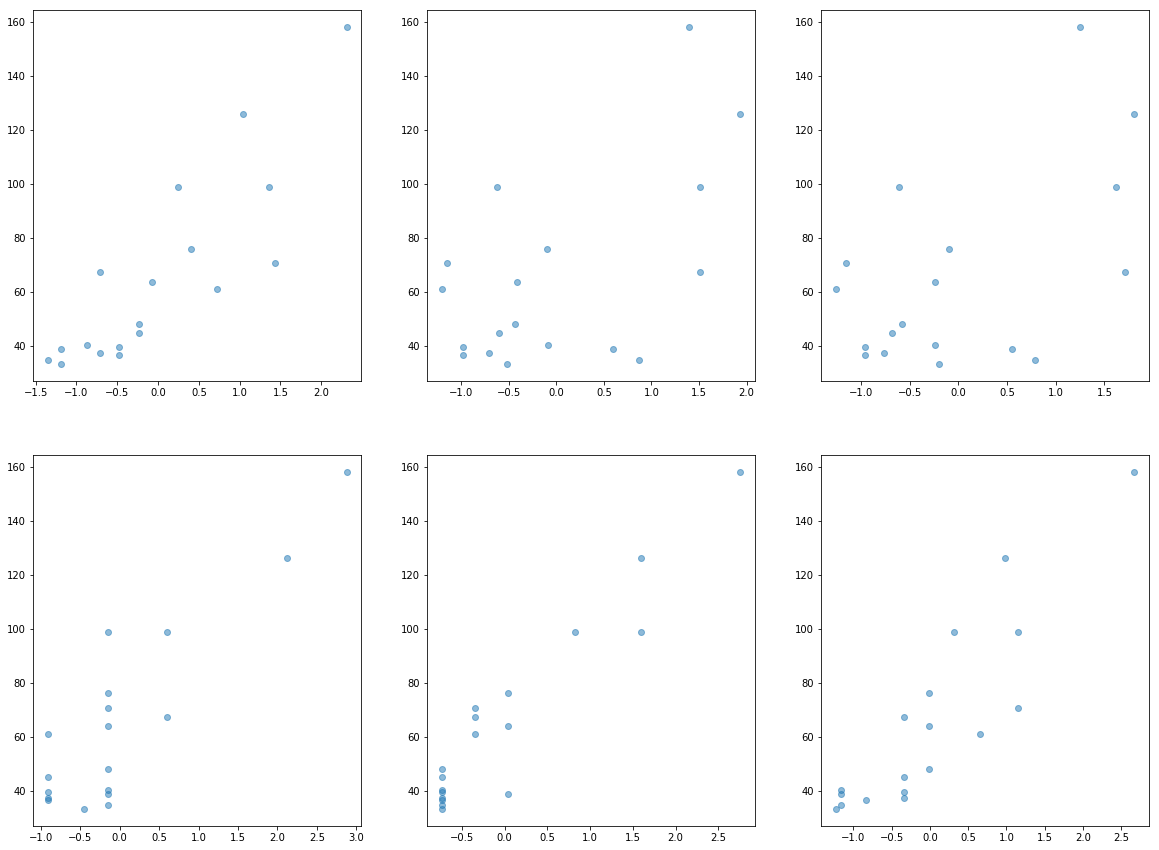

In [7]:
plt.figure(figsize=(20, 15))
for c in range(normalX.shape[1]):
    plt.subplot(2,3, c+1)
    plt.plot(normalX[:, c], y, 'o', alpha=0.5)

## Exe1.Question3. Compute beta using the normal equation

In [20]:
#Vectorization 
#Extending Xe
Xe = np.c_[np.ones((normalX.shape[0],1)),normalX]

In [17]:
#Normaal Equation: beta
beta = np.linalg.inv(Xe.T.dot(Xe)).dot(Xe.T).dot(y)

In [18]:
beta

array([65.18888889, 18.05577085, -5.3521726 , 13.04504442,  4.19572708,
       10.04004069,  1.26250957])

In [19]:
test = np.array([2432, 1607, 1683, 8, 8, 256])
normal_test = func_normal(test)
normal_test_e = np.insert(normal_test,0,1)


predicted = np.sum(normal_test_e.dot(beta))
predicted

110.80403513783277

## Exe1.Question4. cost J(beta)

In [12]:
#Cost function J
j = np.dot(Xe,beta)-y
J = (j.T.dot(j))/X.shape[0]

J

12.396444360915678

## Exe1.Question5.Gradient descent

In [13]:
def gradient_descent(X, y, theta,N, rate):

    for i in range(N):
        prediction = np.dot(X, theta)  
        error = prediction - y
        cost = 1/(X.shape[0]) * np.dot(error.T, error) 
        theta = theta - (rate * np.dot(X.T, error))


    print(cost)
    return theta

In [14]:
init_theta = np.zeros(Xe.shape[1])

theta = gradient_descent(Xe, y, theta=init_theta, N=1000000, rate=0.0001)

12.39644436092588


## Exe1.Question5(a)

In [15]:
cost_normalEq = J

theta =  init_theta
rate=0.0001
i=1

while True:
    prediction = np.dot(Xe, theta)  
    error = prediction - y
    cost = 1/(Xe.shape[0]) * np.dot(error.T, error) 
    theta = theta - (rate * np.dot(Xe.T, error)) 
    if cost <= 1.01*cost_normalEq:
        break
    else :
        i +=1
        continue

print("α ={} , N = {} ".format(rate,i))

α =0.0001 , N = 90960 


## Exe1.Question5(b)

In [16]:
predicted = np.sum(normal_test_e.dot(theta))
predicted

111.79502694112682